In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Uber Request Data.csv')

In [3]:
data = df.copy()

## Explore data

In [4]:
data.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [5]:
data.shape

(6745, 6)

In [6]:
data.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [7]:
data.nunique()

Request id           6745
Pickup point            2
Driver id             300
Status                  3
Request timestamp    5618
Drop timestamp       2598
dtype: int64

In [8]:
data['Pickup point'].unique()

array(['Airport', 'City'], dtype=object)

In [9]:
data['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [10]:
data['Driver id'].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

## check nan values in data

In [11]:
data.isna().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [12]:
data[data['Driver id'].isna()]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
4095,1362,City,NaN,No Cars Available,11/7/2016 0:02,NaN
4096,1364,City,NaN,No Cars Available,11/7/2016 0:06,NaN
4097,1366,City,NaN,No Cars Available,11/7/2016 0:09,NaN
4098,2,Airport,NaN,No Cars Available,11/7/2016 0:23,NaN
4099,7,Airport,NaN,No Cars Available,11/7/2016 0:30,NaN
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


## Fill Driver id nan values with 0 and convert its type to string

In [13]:
data['Driver id'].fillna(0, inplace = True)

In [14]:
data['Driver id'] = data['Driver id'].astype('int')
data['Driver id'] = data['Driver id'].astype('object')

In [15]:
data['Driver id'].dtype

dtype('O')

In [16]:
data['Driver id'].replace(0,'No ID', inplace = True)

In [17]:
data[data['Status'] == 'No Cars Available']['Driver id']

4095    No ID
4096    No ID
4097    No ID
4098    No ID
4099    No ID
        ...  
6740    No ID
6741    No ID
6742    No ID
6743    No ID
6744    No ID
Name: Driver id, Length: 2650, dtype: object

## convert date columns to datetime format

In [18]:
data['Request timestamp'] = pd.to_datetime(data['Request timestamp'])
data['Drop timestamp'] = pd.to_datetime(data['Drop timestamp'])

In [19]:
data.dtypes

Request id                    int64
Pickup point                 object
Driver id                    object
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

## Fill Drop timestamp column naT values with same date as Request timestamp column and zero time as this values for trips not happened as no cars available or cancelled trips

In [20]:
data[data['Drop timestamp'].isna()]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1,Cancelled,2016-07-13 06:08:41,NaT
2832,4805,City,1,Cancelled,2016-07-14 17:07:58,NaT
2833,5202,Airport,1,Cancelled,2016-07-14 20:51:37,NaT
2834,5927,City,1,Cancelled,2016-07-15 10:12:40,NaT
2835,2347,Airport,2,Cancelled,2016-12-07 19:14:00,NaT
...,...,...,...,...,...,...
6740,6745,City,No ID,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,No ID,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,No ID,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,No ID,No Cars Available,2016-07-15 23:54:39,NaT


In [21]:
data['Drop timestamp'].fillna(pd.to_datetime(df['Request timestamp']).dt.date, inplace = True)

In [22]:
data['Drop timestamp']

0      2016-11-07 13:00:00
1      2016-11-07 18:47:00
2      2016-12-07 09:58:00
3      2016-12-07 22:03:00
4      2016-07-13 09:25:47
               ...        
6740   2016-07-15 00:00:00
6741   2016-07-15 00:00:00
6742   2016-07-15 00:00:00
6743   2016-07-15 00:00:00
6744   2016-07-15 00:00:00
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [23]:
from datetime import time 

In [24]:
data[data['Drop timestamp'].dt.time == time(0)]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1,Cancelled,2016-07-13 06:08:41,2016-07-13
2832,4805,City,1,Cancelled,2016-07-14 17:07:58,2016-07-14
2833,5202,Airport,1,Cancelled,2016-07-14 20:51:37,2016-07-14
2834,5927,City,1,Cancelled,2016-07-15 10:12:40,2016-07-15
2835,2347,Airport,2,Cancelled,2016-12-07 19:14:00,2016-12-07
...,...,...,...,...,...,...
6740,6745,City,No ID,No Cars Available,2016-07-15 23:49:03,2016-07-15
6741,6752,Airport,No ID,No Cars Available,2016-07-15 23:50:05,2016-07-15
6742,6751,City,No ID,No Cars Available,2016-07-15 23:52:06,2016-07-15
6743,6754,City,No ID,No Cars Available,2016-07-15 23:54:39,2016-07-15


# Make some date and time columns for more details

## Make Trip Time column from difference between Request timstamp and Drop timestamp columns as time trip took to end

In [25]:
completed_request = data[data.Status == 'Trip Completed']['Request timestamp']
completed_drop = data[data.Status == 'Trip Completed']['Drop timestamp']

In [26]:
data['Trip Time'] = (completed_drop - completed_request)

## Fill naT values in new column as result of records with date and without time in Drop timestamp column

In [27]:
data['Trip Time'].fillna(pd.Timedelta(hours=0),inplace = True)

## Extract trip time column to hours and minutes and seconds as string in Trip Timestamp new column

In [28]:
data['Trip Timestamp'] = data['Trip Time'].dt.components['hours'].astype('str') + ' Hours '+ ' ' + data['Trip Time'].dt.components['minutes'].astype('str') + ' Minutes ' + data['Trip Time'].dt.components['seconds'].astype('str') + ' Seconds'

## Estimate Trip Time in minutes in new column Estimated Trip Time

In [29]:
data['Estimated Trip Time'] = data['Trip Time'].dt.components['hours']*60 + data['Trip Time'].dt.components['minutes']

## Extract week day name of each trip in Trip Day new column

In [30]:
data['Trip Day'] = data['Request timestamp'].dt.day_name()

In [31]:
data['Trip Day'].unique()

array(['Monday', 'Wednesday', 'Thursday', 'Friday'], dtype=object)

In [32]:
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip Time,Trip Timestamp,Estimated Trip Time,Trip Day
0,619,Airport,1,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,0 days 01:09:00,1 Hours 9 Minutes 0 Seconds,69,Monday
1,867,Airport,1,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,0 days 00:50:00,0 Hours 50 Minutes 0 Seconds,50,Monday
2,1807,City,1,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,0 days 00:41:00,0 Hours 41 Minutes 0 Seconds,41,Wednesday
3,2532,Airport,1,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,0 days 00:55:00,0 Hours 55 Minutes 0 Seconds,55,Wednesday
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,0 days 00:52:31,0 Hours 52 Minutes 31 Seconds,52,Wednesday
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,No ID,No Cars Available,2016-07-15 23:49:03,2016-07-15 00:00:00,0 days 00:00:00,0 Hours 0 Minutes 0 Seconds,0,Friday
6741,6752,Airport,No ID,No Cars Available,2016-07-15 23:50:05,2016-07-15 00:00:00,0 days 00:00:00,0 Hours 0 Minutes 0 Seconds,0,Friday
6742,6751,City,No ID,No Cars Available,2016-07-15 23:52:06,2016-07-15 00:00:00,0 days 00:00:00,0 Hours 0 Minutes 0 Seconds,0,Friday
6743,6754,City,No ID,No Cars Available,2016-07-15 23:54:39,2016-07-15 00:00:00,0 days 00:00:00,0 Hours 0 Minutes 0 Seconds,0,Friday


# Insights

## Pie chart for Status

In [33]:
labels, counts= np.unique(data['Status'], return_counts=True)

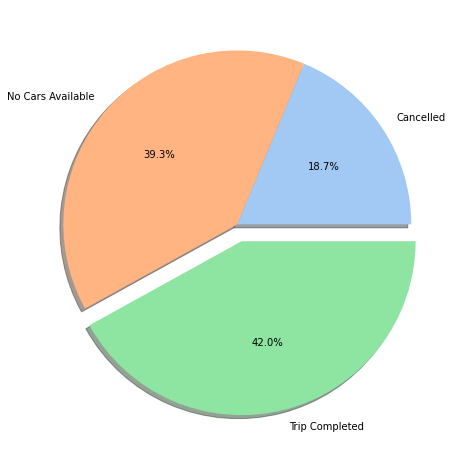

In [34]:
plt.figure(figsize=(12,8))
plt.pie(counts,labels = labels,explode=[0,0,0.1],colors = sns.color_palette('pastel'),shadow = True, autopct='%1.1f%%')
plt.show()

## Number of Trips with different types in each pickup point

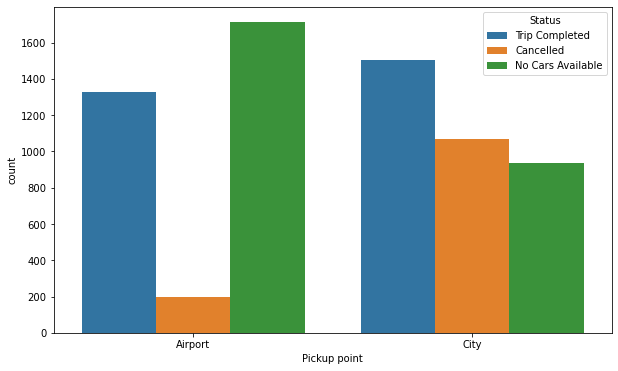

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = 'Pickup point', hue = 'Status');

## Number of Trips in each work day and in each pickup point

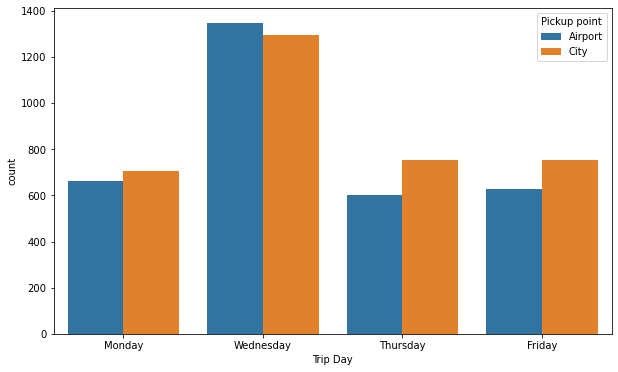

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = 'Trip Day', hue = 'Pickup point');

## Estimated trips time for each work day and for each pickup point
### Note: 0 estimated time values are for trips whom cancelled or not start (no available cars)

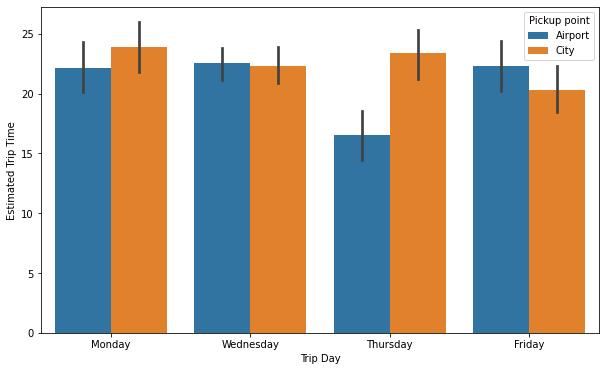

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(data = data, y = 'Estimated Trip Time', x = 'Trip Day', hue = 'Pickup point');

## Estimated trip time for each driver in each pickup time

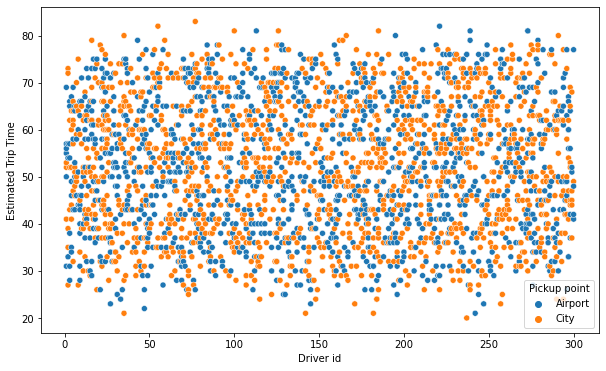

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = data[data['Status'] == 'Trip Completed'], x = 'Driver id' , y = 'Estimated Trip Time', hue = 'Pickup point');

## Average estimated trip time (in minutes) for each work day

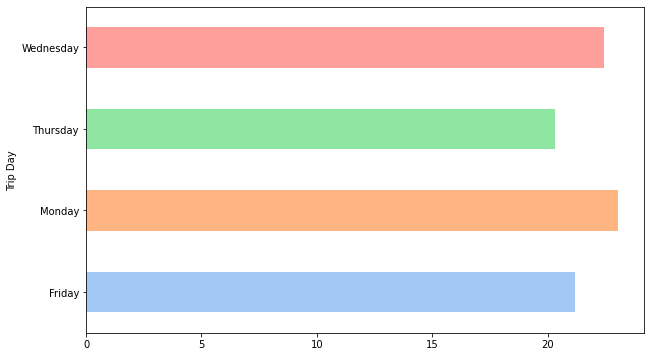

In [39]:
data.groupby('Trip Day')['Estimated Trip Time'].mean().plot(kind='barh',color = sns.color_palette('pastel'), figsize=(10,6));

## Rush hours for trips sorted descendingly according to pickup point

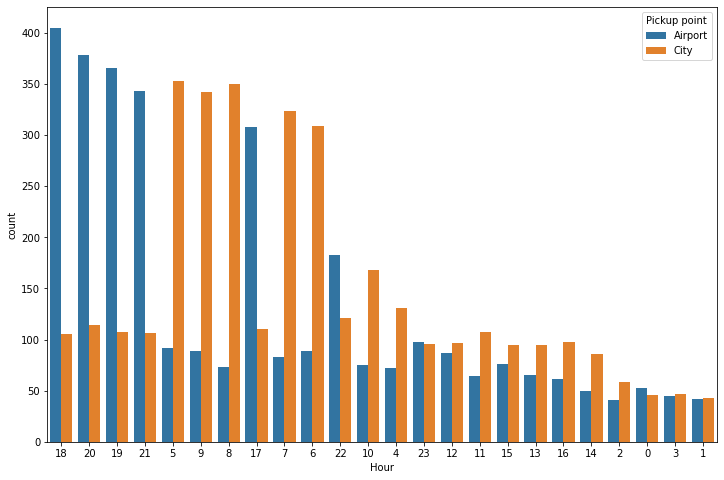

In [40]:
plt.figure(figsize=(12,8))
c= sns.countplot(data['Request timestamp'].dt.hour,order = data["Request timestamp"].dt.hour.value_counts().index,hue=data['Pickup point'])
c.set_xlabel('Hour');